In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [6]:
iris = pd.read_csv('/Users/tkmacl9/Desktop/FastAIDLCourse/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


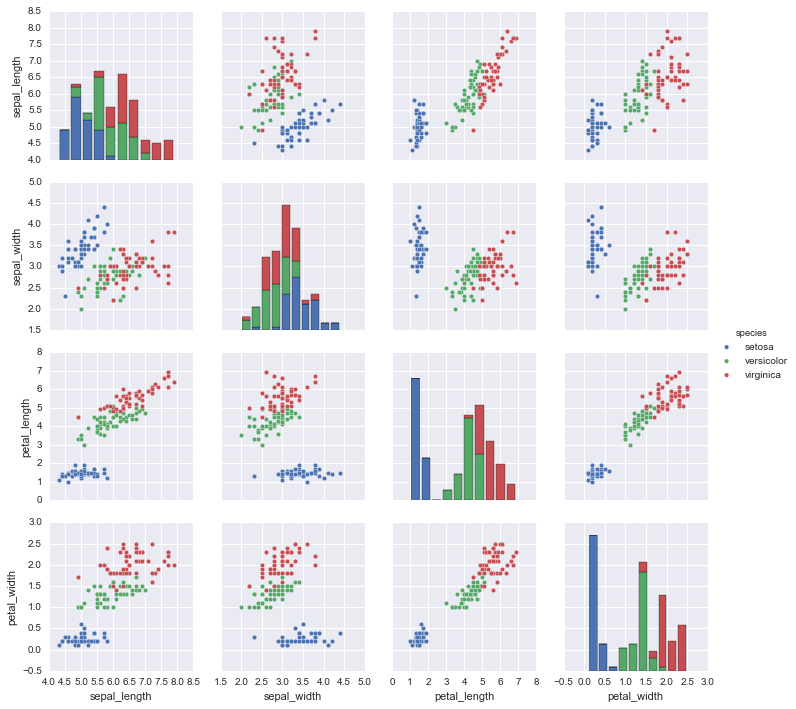

In [7]:
sns.pairplot(iris, hue='species')

In [10]:
x= iris.values[:,:4]
y = iris.values[:,4]

In [28]:
train_X, test_X, train_Y, test_Y = train_test_split(x,y, train_size=0.5, random_state=0)

In [29]:
lr = LogisticRegressionCV()


In [30]:
lr.fit(train_X, train_Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [32]:
print "Accuracy = {:.2f}".format(lr.score(test_X, test_Y))

Accuracy = 0.83


In [46]:
def one_hot_encoding(arr):
    'One hot encoding a numpy array of strings'
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
train_y_ohe = one_hot_encoding(train_Y)
test_y_ohe = one_hot_encoding(test_Y)

In [55]:
model = Sequential()

In [56]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [57]:
model.add(Dense(3))
model.add(Activation('softmax'))

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [59]:
model.fit(train_X, train_y_ohe, batch_size=1, nb_epoch=100, verbose=0)

In [60]:
loss, accuracy = model.evaluate(test_X,test_y_ohe, verbose=0)
print "Accuracy = {:.2f}".format(accuracy)

Accuracy = 0.99
